Silhouette Score for K-Means: 0.26
Silhouette Score for Agglomerative Clustering: 0.34


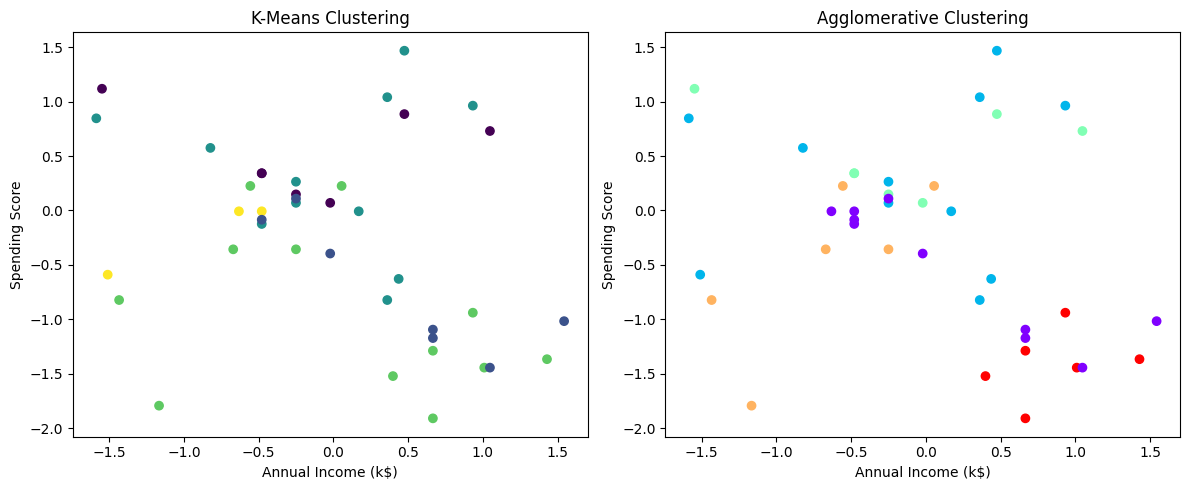

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv(r"C:\\Users\\hp\\OneDrive\\Desktop\\Assignmwnt ML\\Assignmwnt ML\\Mall_Customers.csv")

# Data Preprocessing: Encode categorical column 'Genre'
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])

# Select relevant features (excluding CustomerID)
X = data[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)
labels_kmeans = kmeans.predict(X_test)

# Evaluate K-Means Model
silhouette_kmeans = silhouette_score(X_test, labels_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.2f}")

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
labels_agglo = agglo.fit_predict(X_test)

# Evaluate Agglomerative Model
silhouette_agglo = silhouette_score(X_test, labels_agglo)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_agglo:.2f}")

# Visualization
plt.figure(figsize=(12, 5))

# K-Means Visualization
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 2], X_test[:, 3], c=labels_kmeans, cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

# Agglomerative Clustering Visualization
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 2], X_test[:, 3], c=labels_agglo, cmap='rainbow', marker='o')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()
